# Chronic Kidney Disease 
Chronic kidney disease has affected a valuable portion of World population. For instance, according the Global Burden of Disease study, chronic kidney disease is one of the leading causes of death in the World (Jha et al., 2013). In addition, Alebiosu and  Ayodele (2005) also  indicate that Chronic kidney disease is an aggravated problem for welfare and causes of death in the World. 

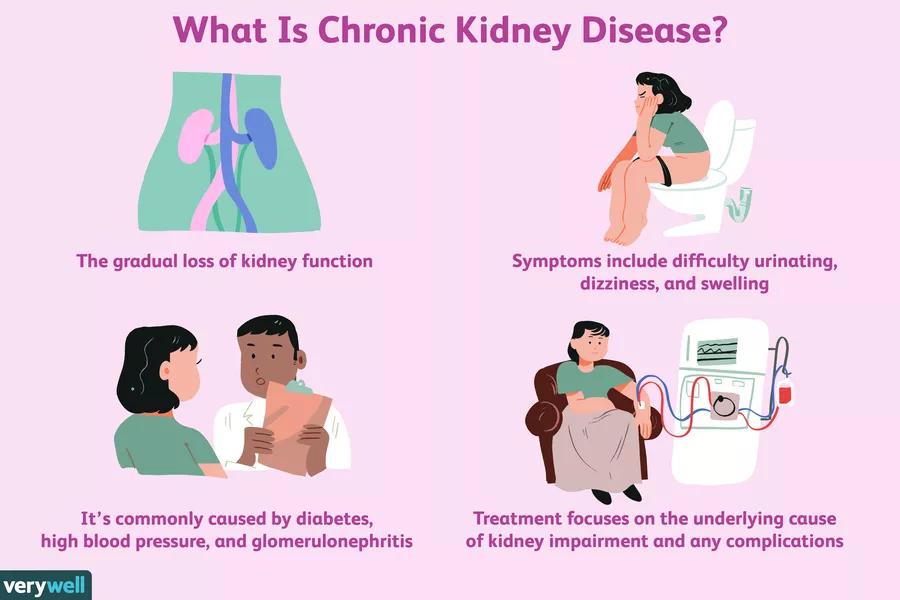
Source: https://www.verywellhealth.com/

***Objective***

The main purpose of this study is to raise awareness about how fatal Chronic Kidney disease is. To do this,I try to create a model to predict if a patient has this disease or not in the dataset.

# 1. IMPORT SOME NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Load Data

In [ ]:
df=pd.read_csv("../input/ckdisease/kidney_disease.csv")

# 2. UNDERSTANDING THE DATA-SET

> Data Summary: The dataset used in this study is  received  from the UCI Machine Learning Repository.  The dataset was created by Soundarapandian and his colleague in 2015. It includes 400 samples with 25 variables, 11 numeric and 14 nominal. The dependent variable “class” has two categories (“CKD” and “NOTCKD”).

**> The description of variables in this data as follows:**
> **Dependent Variable:**
* target: Class (nominal): class - (ckd,notckd)

> **Independent Variable:**
1. Age(numerical) : age in years
1. Blood Pressure(numerical): bp in mm/Hg
1. Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
1. Albumin(nominal): al - (0,1,2,3,4,5)
1. Sugar(nominal): su - (0,1,2,3,4,5)
1. Red Blood Cells(nominal): rbc - (normal,abnormal)
1. Pus Cell (nominal): pc - (normal,abnormal)
1. Pus Cell clumps(nominal): pcc - (present,notpresent)
1. Bacteria(nominal): ba - (present,notpresent)
1. Blood Glucose Random(numerical): bgr in mgs/dl
1. Blood Urea(numerical): bu in mgs/dl
1. Serum Creatinine(numerical): sc in mgs/dl
1. Sodium(numerical): sod in mEq/L
1. Potassium(numerical) pot in mEq/L
1. Hemoglobin(numerical) hemo in gms
1. Packed Cell Volume(numerical)
1. White Blood Cell Count(numerical): wc in cells/cumm
1. Red Blood Cell Count(numerical): rc in millions/cmm
1. Hypertension(nominal) htn : (yes,no)
1. Diabetes Mellitus(nominal): dm - (yes,no)
1. Coronary Artery Disease(nominal): cad - (yes,no)
1. Appetite(nominal): appet - (good,poor)
1. Pedal Edema(nominal): pe - (yes,no)
1. Anemia(nominal): ane - (yes,no)**


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.describe().T

In [ ]:
df.info()

# Checking missing value

In [ ]:
df.isnull().values.any()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

As seen above, there are numerous missing values.  Most variables have various
amounts of missing entries. 

In [ ]:
# Checking missing value with percent
mis_val_percent=((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
mis_val_percent

The variables "'rc','wc','pcv'" are seen as object type. But they should be  numerical type. It needs to change them to numerical dtype.

In [ ]:
for x in ['rc','wc','pcv']:
    df[x] = df[x].str.extract('(\d+)').astype(float)

In [ ]:
df.info()

It need to drop "id" column. It doesn't have any help for the data analysis.

In [ ]:
df.drop(["id"],axis=1,inplace=True)

In [ ]:
# Filling missing numeric data in the dataset with mean
for x in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[x].fillna(df[x].mean(),inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df.shape

# Replace Incorrect Values
•	There are some incorrect values  with columns “cad(coronary artery disease)”, “dm (diabetes mellitus)”, and “classification” such as tyes and \tno.  The values have been recovered systematically. 

In [ ]:
df.cad.value_counts()

In [ ]:
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')

In [ ]:
df.cad.value_counts()

In [ ]:
df.dm.value_counts()

In [ ]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})

In [ ]:
df.dm.value_counts()

In [ ]:
df.classification.value_counts()

In [ ]:
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [ ]:
df.classification.value_counts()

In [ ]:
df.head()

# Cleaning and Preprocessing of Data 

In [ ]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'notckd':0})
e = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
df[e] = df[e].astype("O")
df['classification'] = df['classification'].astype("int")

In [ ]:
df.head()

In [ ]:
# Visualization
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

* There is no high correlation among the features in data set.

# 3. EXPLORATORY DATA ANALYSIS ON CATEGORICAL DATA

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))
print(cat_cols)

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(12,18))
fs = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='classification', data=df, palette='prism', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Not Disease", "Disease"])

# 4. ANALYSIS of NUMERICAL VARIABLE

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "id"]
print('Number of numeric variables: ', len(num_cols))

num_cols

* **Visualization of numeric variables**

In [ ]:
numeric_cols1= ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

def hist_for_nums(data, numeric_cols1):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols1:
        data[col].hist(bins=3)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")
hist_for_nums(df, numeric_cols1)


# 5. ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

Finding the number of values in the dependent column
target: classification (0 = notckd, 1 = ckd)

In [ ]:
df["classification"].value_counts()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df["classification"].value_counts(),  labels=['CKD','NOTCKD'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

> As seen from the values above, there is no big imbalance between the classes of the dependent variable.

# 6. ONE-HOT ENCODING

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))
cat_cols

In [ ]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df= pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns
df, cat_cols = one_hot_encoder(df, nan_as_category= True)

In [ ]:
df.head()

# 7. MODELING

* I split the data set: 80% of the data is train, and 20% of it is test data.

In [ ]:
X = df.drop('classification', axis=1)
y = df[["classification"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

* **Scaling the features**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# LightGBM

> **Model**

In [ ]:
lgbm = LGBMClassifier(random_state=46)
lgbm.fit(X_train, y_train)
Lgbm_pred = lgbm.predict(X_test)
acc_lgbm = round(lgbm.score(X_train, y_train) * 100, 2)
acc_lgbm

# xgboost

> **Model**

In [ ]:
xgboost = XGBClassifier(random_state=46)
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)
acc_xgboost = round(xgboost.score(X_train, y_train) * 100, 2)
acc_xgboost

# DecisionTree

> **Model**

In [ ]:
DecisionTree = XGBClassifier(random_state=46)
DecisionTree.fit(X_train, y_train)
DecisionTree_pred = DecisionTree.predict(X_test)
acc_DecisionTree = round(DecisionTree.score(X_train, y_train) * 100, 2)
acc_DecisionTree

In [ ]:
models = pd.DataFrame({
    'Model': ["LightGBM",'Decision Tree', "XGBOOST"],
    'Score': [acc_lgbm,acc_DecisionTree, acc_xgboost]})
models.sort_values(by='Score', ascending=False)

> **References:**
* Alebiosu, C. O., & Ayodele, O. E. (2005). The global burden of chronic kidney disease and the way forward. Ethnicity & Disease, 15(3), 418.
* Jha, V., Garcia-Garcia, G., Iseki, K., Li, Z., Naicker, S., Plattner, B., ... & Yang, C. W. (2013). Chronic kidney disease: global dimension and perspectives. The Lancet, 382(9888), 260-272.


# If you find this work useful, please don't forget upvoting :)